In [1]:
# Python 3 program to build Bloom Filter
# Install mmh3 and bitarray 3rd party module first
# pip install mmh3
# pip install bitarray
import math
import mmh3
from bitarray import bitarray

In [174]:
class BloomFilter(object):

    '''
    Class for Bloom filter, using murmur3 hash function
    '''

    def __init__(self, size, hash_count):
        '''
        items_count : int
            Number of items expected to be stored in bloom filter
        fp_prob : float
            False Positive probability in decimal
        '''
        # False posible probability in decimal
        # self.fp_prob = fp_prob

        # Size of bit array to use
        self.size = size

        # number of hash functions to use
        self.hash_count = hash_count

        # Bit array of given size
        self.bit_array = bitarray(self.size)

        # initialize all bits as 0
        self.bit_array.setall(0)

    def add(self, item):
        '''
        Add an item in the filter
        '''
        digests = []
        for i in range(self.hash_count):

            # create digest for given item.
            # i work as seed to mmh3.hash() function
            # With different seed, digest created is different
            digest = mmh3.hash(item, i) % self.size
            digests.append(digest)

            # set the bit True in bit_array
            self.bit_array[digest] = True

    def check(self, item):
        '''
        Check for existence of an item in filter
        '''
        for i in range(self.hash_count):
            digest = mmh3.hash(item, i) % self.size
            if self.bit_array[digest] == False:

                # if any of bit is False then,its not present
                # in filter
                # else there is probability that it exist
                return False
        return True

    @classmethod
    def get_size(self, n, p):
        '''
        Return the size of bit array(m) to used using
        following formula
        m = -(n * lg(p)) / (lg(2)^2)
        n : int
            number of items expected to be stored in filter
        p : float
            False Positive probability in decimal
        '''
        m = -(n * math.log(p))/(math.log(2)**2)
        return int(m)

    @classmethod
    def get_hash_count(self, m, n):
        '''
        Return the hash function(k) to be used using
        following formula
        k = (m/n) * lg(2)

        m : int
            size of bit array
        n : int
            number of items expected to be stored in filter
        '''
        k = (m/n) * math.log(2)
        return int(k)

In [175]:
from random import shuffle
#https://www.kaggle.com/teseract/urldataset
with open('urldata.csv','r') as file:
    data = file.readlines()[1:30000]
    
for i, url in enumerate(data):
    url = url.split(',')[0]
    data[i] = url
    
data_present = data[:int(len(data)/2)]
data_absent = data[int(len(data)/2)+1:]
test_data = data_present + data_absent
shuffle(test_data)

In [176]:
import time

def bloom_compare(size, hash_count, data_present, data_absent):
    start = time.time()
    bloomf = BloomFilter(size, hash_count)
    print("Size of bit array:{}".format(bloomf.size))
    
    for item in data_present:
        bloomf.add(item)
        
    false_positive_num, possible_true_positive, true_negative_num = 0,0,0
    for url in test_data:
        if bloomf.check(url):
            if url in data_absent:
                false_positive_num += 1
            else:
                possible_true_positive += 1
        else:
            true_negative_num += 1
            
    end = time.time()
    print(false_positive_num, possible_true_positive, true_negative_num)
    return end-start,false_positive_num/(false_positive_num+true_negative_num)

In [7]:
all_sizes = []
all_hash_counts = []
all_times = []
all_fps = []

for h in range(2,10):
    sizes = [1000*i for i in range(1,201,10)]
    hash_counts = [h for _ in range(1,21)]
    times = []
    fps = []
    for i, size in enumerate(sizes):
        a,b = bloom_compare(size,hash_counts[i], data_present,data_absent)
        times.append(a)
        fps.append(b)
    all_sizes.append(sizes)
    all_hash_counts.append(hash_counts)
    all_times.append(times)
    all_fps.append(fps)

Size of bit array:1000
0
111
222
15178 14820 0
Size of bit array:11000
0
111
222
12705 14820 2473
Size of bit array:21000
0
111
222
8175 14820 7003
Size of bit array:31000
0
111
222
5338 14820 9840
Size of bit array:41000
0
111
222
3843 14820 11335
Size of bit array:51000
0
111
222
2913 14820 12265
Size of bit array:61000
0
111
222
2355 14820 12823
Size of bit array:71000
0
111
222
1894 14820 13284
Size of bit array:81000
0
111
222
1606 14820 13572
Size of bit array:91000
0
111
222
1407 14820 13771
Size of bit array:101000
0
111
222
1206 14820 13972
Size of bit array:111000
0
111
222
1059 14820 14119
Size of bit array:121000
0
111
222
999 14820 14179
Size of bit array:131000
0
111
222
882 14820 14296
Size of bit array:141000
0
111
222
841 14820 14337
Size of bit array:151000
0
111
222
796 14820 14382
Size of bit array:161000
0
111
222
726 14820 14452
Size of bit array:171000
0
111
222
647 14820 14531
Size of bit array:181000
0
111
222
664 14820 14514
Size of bit array:191000
0
111
222


In [8]:
all_times
all_fps

[[1.0,
  0.8370668072209777,
  0.5386085123204638,
  0.35169324021610227,
  0.2531954144156015,
  0.19192251943602584,
  0.1551587824482804,
  0.12478587429173804,
  0.10581104229806299,
  0.0926999604691,
  0.0794571089735143,
  0.06977203847674265,
  0.06581894847806036,
  0.05811042298062986,
  0.05540914481486362,
  0.05244432731585189,
  0.04783238898405587,
  0.042627487152457504,
  0.043747529318750825,
  0.04025563315324812],
 [1.0,
  0.9349057846883647,
  0.6418500461193833,
  0.40479641586506787,
  0.27006193174331267,
  0.19139544076953485,
  0.14152062195282647,
  0.10403215179865595,
  0.08525497430491501,
  0.07458163130847278,
  0.060943470813018846,
  0.0512584003162472,
  0.0482276979839241,
  0.042956911319014364,
  0.039530899986823034,
  0.03676373698774542,
  0.03584134932138622,
  0.0321517986559494,
  0.03254710765581763,
  0.03017525365660825],
 [1.0,
  0.9731189880089604,
  0.7415996837528,
  0.4812887073395704,
  0.30867044406377653,
  0.20378178943207273,
  0

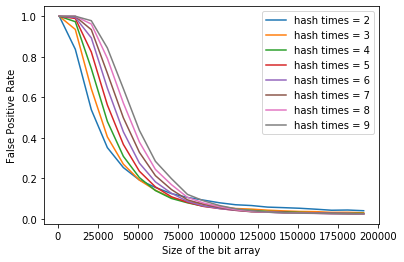

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')

hash_time = 2
for fps in all_fps:
    plt.plot(all_sizes[0],fps,label="hash times = {}".format(hash_time))
    plt.legend(loc='upper right')
    hash_time += 1
plt.show()
fig.savefig('bit_array.jpg')

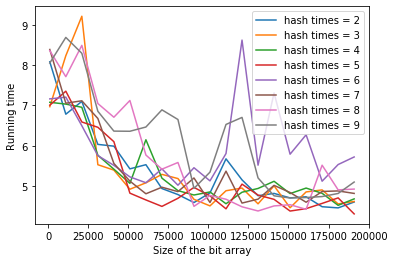

In [10]:
fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('Running time')

hash_time = 2
for t in all_times:
    plt.plot(all_sizes[0],t,label="hash times = {}".format(hash_time))
    plt.legend(loc='upper right')
    hash_time += 1
plt.show()
fig.savefig('time.jpg')

In [194]:
import math

def fp_varify(m, n):
    '''
    k = (m/n) * lg(2)

    m : int
        size of bit array
    n : int
        number of items expected to be stored in filter
    '''
    k = (m/n) * math.log(2)
    p = math.exp(-k*n/m)
    fp = pow(1-p,k)
    return fp

print( (size/len(data_present)) * math.log(2))
for i, size in enumerate(all_sizes[-2]):
    print(all_fps[-1][i], fp_varify(size,len(data_present)))
    print(100*abs(all_fps[-1][i]-fp_varify(size,len(data_present)))/fp_varify(size,len(data_present)))

8.826662543299523
1.0 0.9684752645528679
3.255089376153208
1.0 0.7030300093095735
42.241438737739315
0.97022005534326 0.5103395120968921
90.11266663574655
0.8474107260508631 0.37046273154551557
128.7438529958442
0.6392805376202398 0.26892418127740053
137.71775917793332
0.4354328633548557 0.19521589924581867
123.05194660735721
0.28771906707076034 0.14171000591071145
103.0336991532173
0.1940967189353011 0.1028693147064147
88.68281517111892
0.12544472262485176 0.07467430291997129
67.98914448426964
0.08360785347213072 0.05420714167774958
54.23770906269581
0.06588483331137172 0.039349737379145364
67.43398482321123
0.047964158650678615 0.028564535666031638
67.9150650704139
0.03834497298721834 0.02073540389747109
84.92513180268907
0.0330741863223086 0.015052125468384716
119.73100338405486
0.030043483989985506 0.010926552587848483
174.95848986621024
0.02839636315720121 0.007931740384823565
258.0092360503157
0.02714455132428515 0.005757763487287528
371.44262497438734
0.026288048491237316 0.0041

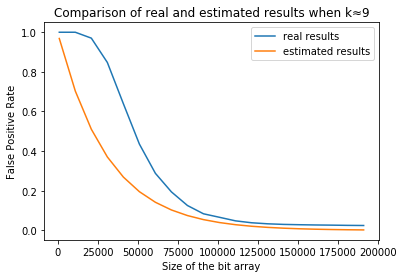

In [201]:
fig = plt.figure()
plt.title('Comparison of real and estimated results when k≈9')
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')

value = []
for i, size in enumerate(all_sizes[-2]):
    v = fp_varify(size,len(data_present))
    value.append(v)
plt.plot(all_sizes[0],all_fps[-1],label="real results")
plt.plot(all_sizes[0],value,label="estimated results")

plt.legend(loc='upper right')

plt.show()
fig.savefig('k_cmp.jpg')

In [64]:
a,b = bloom_compare(100000,9, data_present,data_absent)
a,b

Size of bit array:100000
0
111
222
1038 14820 14140


(5.092956781387329, 0.06838845697720385)

In [67]:
bf = BloomFilter(100,4)
bf.bit_array

bitarray('0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000')

In [21]:
bloomf = BloomFilter(200, 4)
len(bloomf.bit_array)

200

In [177]:
class PartialBloomFilter(object):

    '''
    Class for Partial Bloom filter, using murmur3 hash function
    '''

    def __init__(self, size, hash_count):
        '''
        items_count : int
            Number of items expected to be stored in bloom filter
        fp_prob : float
            False Positive probability in decimal
        '''
        # False posible probability in decimal
        # self.fp_prob = fp_prob

        # Size of bit array to use
        self.size = size

        # number of hash functions to use
        self.hash_count = hash_count
        
        # unit array size
        self.unit = int(size/hash_count)
        
        # Bit array of given size
        self.bit_array_whole = bitarray(self.size)
        
        # initialize all bits as 0
        self.bit_array_whole.setall(0)
        
        # Divide
        self.bit_array = []
        
        for i in range(self.hash_count):
            if i != self.hash_count - 1:
                self.bit_array.append(self.bit_array_whole[i*self.unit:self.unit*(i+1)])
            else:
                print(len(self.bit_array_whole[i*self.unit:]))
                self.bit_array.append(self.bit_array_whole[i*self.unit:])
        

    def add(self, item):
        '''
        Add an item in the filter
        '''
        digests = []
        for i in range(self.hash_count):

            # create digest for given item.
            # i work as seed to mmh3.hash() function
            # With different seed, digest created is different
            digest = mmh3.hash(item, i) % self.unit
            digests.append(digest)
            
            # print(digest,i)
            # print(i*self.unit+len(self.bit_array[i]))
            # set the bit True in bit_array
            self.bit_array[i][digest] = True

    def check(self, item):
        '''
        Check for existence of an item in filter
        '''
        for i in range(self.hash_count):
            digest = mmh3.hash(item, i) % self.unit
            if self.bit_array[i][digest] == False:

                # if any of bit is False then,its not present
                # in filter
                # else there is probability that it exist
                return False
        return True

    @classmethod
    def get_size(self, n, p):
        '''
        Return the size of bit array(m) to used using
        following formula
        m = -(n * lg(p)) / (lg(2)^2)
        n : int
            number of items expected to be stored in filter
        p : float
            False Positive probability in decimal
        '''
        m = -(n * math.log(p))/(math.log(2)**2)
        return int(m)

    @classmethod
    def get_hash_count(self, m, n):
        '''
        Return the hash function(k) to be used using
        following formula
        k = (m/n) * lg(2)

        m : int
            size of bit array
        n : int
            number of items expected to be stored in filter
        '''
        k = (m/n) * math.log(2)
        return int(k)


In [178]:
pmf = PartialBloomFilter(122,8)
print(len(pmf.bit_array_whole))
pmf.bit_array

17
122


[bitarray('000000000000000'),
 bitarray('000000000000000'),
 bitarray('000000000000000'),
 bitarray('000000000000000'),
 bitarray('000000000000000'),
 bitarray('000000000000000'),
 bitarray('000000000000000'),
 bitarray('00000000000000000')]

In [179]:
def partial_bloom_compare(size, hash_count, data_present, data_absent):
    start = time.time()
    bloomf = PartialBloomFilter(size, hash_count)
    print("Size of bit array:{}".format(bloomf.size))
    
    for item in data_present:
        bloomf.add(item)
        
    false_positive_num, possible_true_positive, true_negative_num = 0,0,0
    for url in test_data:
        if bloomf.check(url):
            if url in data_absent:
                false_positive_num += 1
            else:
                possible_true_positive += 1
        else:
            true_negative_num += 1
            
    end = time.time()
    print(false_positive_num, possible_true_positive, true_negative_num)
    return end-start,false_positive_num/(false_positive_num+true_negative_num)

In [160]:
all_sizes = []
all_hash_counts = []
all_times = []
all_fps = []

for h in range(2,10):
    sizes = [1000*i for i in range(1,201,10)]
    hash_counts = [h for _ in range(1,21)]
    times = []
    fps = []
    for i, size in enumerate(sizes):
        a,b = partial_bloom_compare(size,hash_counts[i], data_present,data_absent)
        times.append(a)
        fps.append(b)
    all_sizes.append(sizes)
    all_hash_counts.append(hash_counts)
    all_times.append(times)
    all_fps.append(fps)

500
Size of bit array:1000
15178 14820 0
5500
Size of bit array:11000
12763 14820 2415
10500
Size of bit array:21000
8169 14820 7009
15500
Size of bit array:31000
5447 14820 9731
20500
Size of bit array:41000
3792 14820 11386
25500
Size of bit array:51000
2823 14820 12355
30500
Size of bit array:61000
2350 14820 12828
35500
Size of bit array:71000
1871 14820 13307
40500
Size of bit array:81000
1579 14820 13599
45500
Size of bit array:91000
1320 14820 13858
50500
Size of bit array:101000
1160 14820 14018
55500
Size of bit array:111000
1111 14820 14067
60500
Size of bit array:121000
937 14820 14241
65500
Size of bit array:131000
902 14820 14276
70500
Size of bit array:141000
795 14820 14383
75500
Size of bit array:151000
815 14820 14363
80500
Size of bit array:161000
720 14820 14458
85500
Size of bit array:171000
672 14820 14506
90500
Size of bit array:181000
659 14820 14519
95500
Size of bit array:191000
583 14820 14595
334
Size of bit array:1000
15178 14820 0
3668
Size of bit array:110

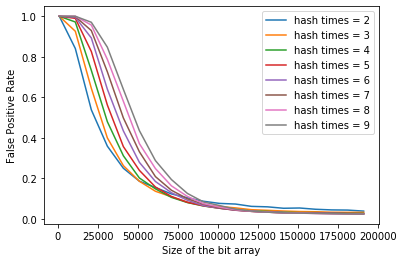

In [161]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')

hash_time = 2
for fps in all_fps:
    plt.plot(all_sizes[0],fps,label="hash times = {}".format(hash_time))
    plt.legend(loc='upper right')
    hash_time += 1
plt.show()
fig.savefig('bit_array_partial.jpg')

In [180]:
for h in range(4,5):
    sizes = [1000*i for i in range(1,201,10)]
    hash_counts = [h for _ in range(1,21)]
    times,times_partial,fps,fps_partial = [],[],[],[]
    for i, size in enumerate(sizes):
        a,b = bloom_compare(size,hash_counts[i], data_present,data_absent)
        c,d = partial_bloom_compare(size,hash_counts[i], data_present,data_absent)
        times.append(a)
        fps.append(b)
        times_partial.append(c)
        fps_partial.append(d)

Size of bit array:1000
15178 14820 0
250
Size of bit array:1000
15178 14820 0
Size of bit array:11000
14770 14820 408
2750
Size of bit array:11000
14748 14820 430
Size of bit array:21000
11256 14820 3922
5250
Size of bit array:21000
11125 14820 4053
Size of bit array:31000
7305 14820 7873
7750
Size of bit array:31000
7280 14820 7898
Size of bit array:41000
4685 14820 10493
10250
Size of bit array:41000
4728 14820 10450
Size of bit array:51000
3093 14820 12085
12750
Size of bit array:51000
3062 14820 12116
Size of bit array:61000
2121 14820 13057
15250
Size of bit array:61000
2251 14820 12927
Size of bit array:71000
1530 14820 13648
17750
Size of bit array:71000
1611 14820 13567
Size of bit array:81000
1204 14820 13974
20250
Size of bit array:81000
1221 14820 13957
Size of bit array:91000
950 14820 14228
22750
Size of bit array:91000
965 14820 14213
Size of bit array:101000
834 14820 14344
25250
Size of bit array:101000
800 14820 14378
Size of bit array:111000
696 14820 14482
27750
Size

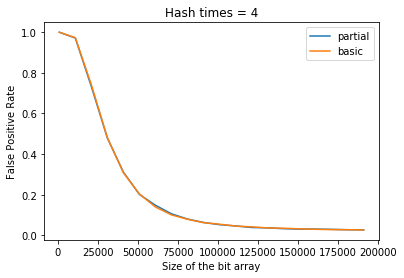

[1.0, 0.9731189880089604, 0.7415996837528, 0.4812887073395704, 0.30867044406377653, 0.20378178943207273, 0.13974173145341942, 0.10080379496639874, 0.07932533930689155, 0.06259059164580313, 0.054947950981684014, 0.04585584398471472, 0.041902753986032416, 0.03663196732112268, 0.03505073132164976, 0.03195414415601529, 0.029977599156674133, 0.028264593490578468, 0.027803399657398867, 0.02681512715772829] [1.0, 0.9731189880089604, 0.7415996837528, 0.4812887073395704, 0.30867044406377653, 0.20378178943207273, 0.13974173145341942, 0.10080379496639874, 0.07932533930689155, 0.06259059164580313, 0.054947950981684014, 0.04585584398471472, 0.041902753986032416, 0.03663196732112268, 0.03505073132164976, 0.03195414415601529, 0.029977599156674133, 0.028264593490578468, 0.027803399657398867, 0.02681512715772829]


In [181]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')
plt.title('Hash times = 4')

plt.plot(all_sizes[2],fps_partial,label="partial".format(hash_time))
plt.plot(all_sizes_basic[0],fps,label="basic".format(hash_time))
plt.legend(loc='upper right')

plt.show()
fig.savefig('bit_array_compare.jpg')
print(fps,all_fps_basic[0])

In [206]:
from random import shuffle
#https://www.kaggle.com/teseract/urldataset
with open('urldata.csv','r') as file:
    data = file.readlines()[:100000]
    
for i, url in enumerate(data):
    url = url.split(',')[0]
    data[i] = url
    
data_present = data[:int(len(data)/2)]
data_absent = data[int(len(data)/2)+1:]
test_data = data_present + data_absent
shuffle(test_data)


for h in range(4,5):
    sizes = [1000*i for i in range(1,201,10)]
    hash_counts = [h for _ in range(1,21)]
    times,times_partial,fps,fps_partial = [],[],[],[]
    for i, size in enumerate(sizes):
        a,b = bloom_compare(size,hash_counts[i], data_present,data_absent)
        c,d = partial_bloom_compare(size,hash_counts[i], data_present,data_absent)
        times.append(a)
        fps.append(b)
        times_partial.append(c)
        fps_partial.append(d)

Size of bit array:1000
49999 50000 0
250
Size of bit array:1000
49999 50000 0
Size of bit array:11000
49999 50000 0
2750
Size of bit array:11000
49999 50000 0
Size of bit array:21000
49942 50000 57
5250
Size of bit array:21000
49970 50000 29
Size of bit array:31000
49380 50000 619
7750
Size of bit array:31000
49409 50000 590
Size of bit array:41000
47436 50000 2563
10250
Size of bit array:41000
47501 50000 2498
Size of bit array:51000
43839 50000 6160
12750
Size of bit array:51000
44035 50000 5964
Size of bit array:61000
39759 50000 10240
15250
Size of bit array:61000
39673 50000 10326
Size of bit array:71000
35597 50000 14402
17750
Size of bit array:71000
35511 50000 14488
Size of bit array:81000
30702 50000 19297
20250
Size of bit array:81000
30970 50000 19029
Size of bit array:91000
26976 50000 23023
22750
Size of bit array:91000
26963 50000 23036
Size of bit array:101000
23491 50000 26508
25250
Size of bit array:101000
23323 50000 26676
Size of bit array:111000
20257 50000 29742
27

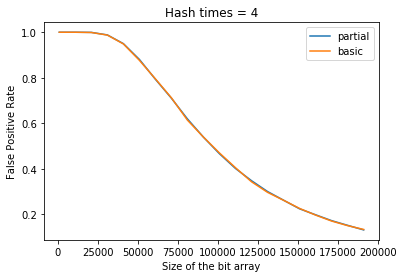

[1.0, 1.0, 0.998859977199544, 0.987619752395048, 0.9487389747794955, 0.876797535950719, 0.7951959039180784, 0.7119542390847817, 0.6140522810456209, 0.5395307906158123, 0.46982939658793177, 0.4051481029620592, 0.34346686933738674, 0.2971259425188504, 0.2622252445048901, 0.2263845276905538, 0.19722394447888958, 0.17104342086841737, 0.1509230184603692, 0.13410268205364106] [1.0, 0.9731189880089604, 0.7415996837528, 0.4812887073395704, 0.30867044406377653, 0.20378178943207273, 0.13974173145341942, 0.10080379496639874, 0.07932533930689155, 0.06259059164580313, 0.054947950981684014, 0.04585584398471472, 0.041902753986032416, 0.03663196732112268, 0.03505073132164976, 0.03195414415601529, 0.029977599156674133, 0.028264593490578468, 0.027803399657398867, 0.02681512715772829]


In [215]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')
plt.title('Hash times = 4')

plt.plot(all_sizes[2],fps_partial,label="partial".format(hash_time))
plt.plot(all_sizes_basic[0],fps,label="basic".format(hash_time))
plt.legend(loc='upper right')

plt.show()
fig.savefig('bit_array_compare.jpg')
print(fps,all_fps_basic[0])

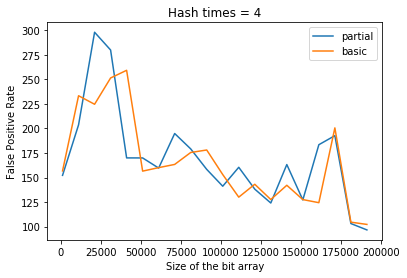

In [216]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')
plt.title('Hash times = 4')

plt.plot(all_sizes[2],times_partial,label="partial".format(hash_time))
plt.plot(all_sizes_basic[0],times,label="basic".format(hash_time))
plt.legend(loc='upper right')

plt.show()
fig.savefig('time_cmp.jpg')

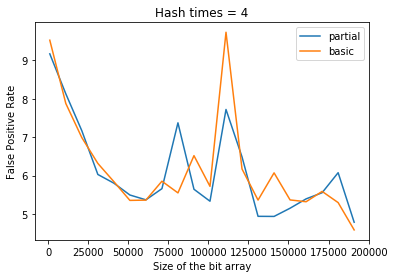

In [204]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.xlabel('Size of the bit array')
plt.ylabel('False Positive Rate')
plt.title('Hash times = 4')

plt.plot(all_sizes[2],times_partial,label="partial".format(hash_time))
plt.plot(all_sizes_basic[0],times,label="basic".format(hash_time))
plt.legend(loc='upper right')

plt.show()
fig.savefig('time_cmp.jpg')